# **Clase 15: Introducción a Machine Learning (ML)** 
## Profesores: Juan Sebastián Moreno y Julián Chitiva. 

## ¿Qué es ML? (Data Science)
<img src="https://sitiobigdata.com/wp-content/uploads/2018/08/Los-tres-núcleos-de-Data-Science.png" alt="ML" style="width: 500px;" align="center" frameborder="200"/>


## ¿Qué es ML? (AI)
<img src="http://simplecore.intel.com/newsroom/wp-content/uploads/sites/11/2018/05/artificial-intelligence-terms.jpg" alt="ML" style="width: 700px;" align="center" frameborder="200"/>


## Tipos de Aprendizaje
### Aprendizaje Supervisado
<img src="https://miro.medium.com/max/620/0*K_Hfk5UaGmmv5Us9" alt="ML" style="width: 700px;" align="center" frameborder="200" />


<img src="https://i2.wp.com/vinodsblog.com/wp-content/uploads/2018/11/Classification-vs-Regression-Algorithms.png?resize=1300%2C882&ssl=1" alt="ML" style="width: 500px;" align="center" frameborder="200"/>


### Aprendizaje No Supervisado
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/unsupervised-machine-learning-2.png" alt="ML" style="width: 500px;" align="center" frameborder="200"/>


## Supervisado vs No Supervisado
<img src="https://www.researchgate.net/publication/329533120/figure/fig1/AS:702267594399761@1544445050584/Supervised-learning-and-unsupervised-learning-Supervised-learning-uses-annotation.png" alt="ML" style="width: 500px;" align="center" frameborder="200"/>
<img src="https://www.researchgate.net/profile/Zhenyu-Wen-2/publication/336642133/figure/fig3/AS:815304842170368@1571395230317/Examples-of-Supervised-Learning-Linear-Regression-and-Unsupervised-Learning.png" alt="ML" style="width: 500px;" align="center" frameborder="200"/>

### Ejemplos: 
- Pronóstico de Demanda.
- Sugerir futuros productos.
- Scoring Crediticio.
- Predicción de desafiliación de Clientes.
- Segmentar clientes.
- Detectar un fraude.

## Aplicaciones
### Por tipos de datos:
- Estructurados corte transversal.
- Estructurados series de tiempo.
- Texto.
- No estructurados: 
    - Imagenes.
    - Voz.
    - Videos.
### Por sector:
- Público:
    - Seguridad.
    - Transparencia.
    - Asignación de Recursos.
    - Detección de fraude.
- Industria:
    - Mantenimientos.
    - Optimización de Inventarios.
- Comercial (Retail):
    - Personalización de marketing.
    - Recomendación de productos.
    - Mejoramiento de la experiencia de usuario.
    - Retención de clientes.
    - Pronóstico de la demanda.
    - Pricing.
    - Ubicación de recursos.
- Finanzas:
    - Detección de fraude.
    - Optimización de portafolio.
    - Trading algorítmico.
    - Cuantificación y manejo de riesgos.

## Problemas y Soluciones:
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png" alt="ML" style="width: 500px;" align="center" frameborder="200"/>

<img src="https://conlanscientific.com/media/content/splitting-data.png" alt="ML" style="width: 500px;" align="center" frameborder="200"/>



## Codigo:

In [1]:
import pandas as pd
import numpy as np

### Regresión:
- Mínimos cuadrados ordinarios (Regresión Lineal)
- Árboles de regresión

Además, para evaluar el desempeño de los modelos implementados, se estudiarán las métricas de evaluación:
- R-cuadrado
- MSE
- MAPE

## 0. Introducción a Scikit-Learn

Existen varias librerias de Python que proveen implementaciones solidas de multiples algoritmos de aprendizaje de máquinas. Una de las más conocidas es [Scikit-Learn](http://scikit-learn.org). Scikit-Learn se caracteriza por ser una API limpia, uniforme y optimizada, y por tener una documentación en línea muy útil y completa.Una ventaja de esta uniformidad es que una vez que comprende el uso básico y la sintaxis de Scikit-Learn para un tipo de modelo, cambiar a un nuevo modelo o algoritmo es muy sencillo.

### Uso básico de la API

Por lo general, los pasos a seguir para utilizar los modelos implementados en Scikit-Learn son:

1. Seleccionar una clase de modelo importando la clase de estimador apropiada de Scikit-Learn.
2. Seleccionar los hiper parámetros del modelo al instanciar la clase anterior con estos valores.
3. Organizar los datos en una matriz de variables y un vector objetivo.
4. Ajustar el modelo a los datos llamando al método `` fit () `` de la instancia del modelo.
5. Evaluar el modelo en nuevos datos.

## 1. Mínimos Cuadrados Ordinarios
### Regresión lineal univariada

Los modelos de regresión lineal son un buen punto de partida para las tareas de regresión. Dichos modelos son populares porque pueden ajustarse muy rápidamente y son muy interpretables.

Comenzaremos con la regresión lineal más familiar, un ajuste en línea recta a los datos.
Un ajuste en línea recta es un modelo de la forma
$$
y = ax + b
$$
donde $a$ es la *pendiente*, y $b$ is el *intercepto*.

Considere los siguientes datos, que están dispersos alrededor de un modelo lineal con una pendiente de 2 y una intersección de -5:

In [2]:
# importar paquetes estandar
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

### Generar datos sintéticos

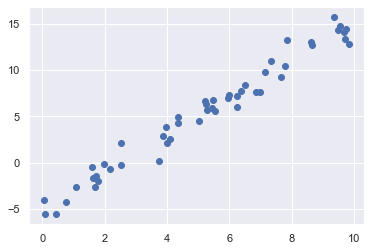

In [3]:
# para tener replicabilidad
rng = np.random.RandomState(4)

# generamos puntos distribuidos de manera uniforme entre 0 y 10
x = 10 * rng.rand(50,1)

# generamos los valores de y usando un modelo lineal con pendiente 2
# e intercepto -5 mas un ruido alatorio
y = 2 * x[:,0] - 5 + rng.randn(50)

# construit un grafico de puntos
plt.scatter(x, y);

### Encontrar el mejor ajuste (usando Numpy)

Escribiendo el modelo de forma matricial tenemos: $Y = X^T \beta$.

Queremos encontrar $\hat \beta$ que minimice el costo $(Y-\hat Y)^2$ donde $\hat Y = X^T \hat \beta$. <br>
Esto es $\hat \beta = (X^TX)^{-1}X^TY$

In [4]:
# resolvamos el problema utilziando el paquete numpy
import numpy as np

print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
# creamos la matriz que contiene una columna de 1's y la variable x
X = np.matrix([np.ones(len(x),dtype=x.dtype),x.reshape(-1)])

# np.matrix toma cada entrada como una fila.
# trasponemos para tener observaciones x variables
X=X.T

In [6]:
# estimación de beta
beta_estimado = (np.linalg.inv(X.T*X)*X.T).dot(y)
print("Pendiente del modelo: {}".format(beta_estimado[0,1]))
print("Intercepto del modelo: {}".format(beta_estimado[0,0]))

Pendiente del modelo: 2.0152066809931957
Intercepto del modelo: -5.054309619437671


### Encontrar el mejor ajuste utilizando Scikit-Learn

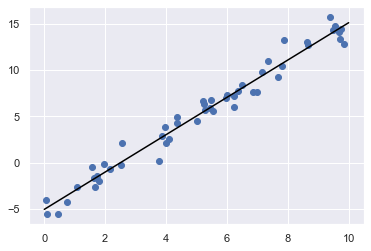

In [7]:
#importar LinearRegression de Scikit-Learn
from sklearn.linear_model import LinearRegression

# crear un modelo lineal con intercepto
model = LinearRegression(fit_intercept=True)

# ajustar el modelo a los datos
model.fit(x, y)

# graficar la funcion lineal estimada
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# build plot
plt.scatter(x, y)
plt.plot(xfit, yfit, color='black');

In [8]:
print("Pendiente del modelo:    ", model.coef_[0])
print("Intercepto del modelo:", model.intercept_)

Pendiente del modelo:     2.0152066809931943
Intercepto del modelo: -5.054309619437661


## Métricas de desempeño

- $MSE = mean((Y-\hat Y)^2)$ 
<br>
<br>
- $MAPE = mean(\mid Y-\hat Y \mid)$ 
<br>
<br>
- $R^2 = \dfrac{\sigma^{2}_{XY}}{\sigma^{2}_{X}\sigma^{2}_{Y}}$ donde $\sigma^{2}_{XY}$ es la covarianza de $X,Y$, $\sigma^{2}_{X}$ la varianza de $X$ y $\sigma^{2}_{Y}$ la varianza de $Y$. 

In [9]:
# realizar la predicción dentro de muestra
y_pred = model.coef_[0]*x + model.intercept_

In [10]:
# error cuadrático medio en el entrenamiento
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
print("El modelo de regresión lineal tiene un MSE = {0:.3f} dentro de muestra".format(mse))

El modelo de regresión lineal tiene un MSE = 0.992 dentro de muestra


In [11]:
# error cuadrático medio en el entrenamiento
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y,y_pred)
print("El modelo de regresión lineal tiene un MAPE = {0:.3f} dentro de muestra".format(mae))

El modelo de regresión lineal tiene un MAPE = 0.780 dentro de muestra


In [12]:
# error cuadrático medio en el entrenamiento
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print("El modelo de regresión lineal tiene un R2 = {0:.3f} dentro de muestra".format(r2))

El modelo de regresión lineal tiene un R2 = 0.972 dentro de muestra


Existen otros paquetes que contienen implementaciones de este mismo modelo. Por ejemplo pueden pribar con: <br>
``statsmodels.formula.api.ols``

### Regresión Lineal Múltiple

El estimador ``LinearRegression`` también puede estimar modelos multivariables de la forma
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
donde hay multiples valores para $x$.
Geométricamente, esto es ajustar un plano a puntos en tres dimenciones o un hiper plano para dimensiones mayores.

In [13]:
# creamos datos con 5 variables distribuidas uniformemente entre 0 y 10
# creamos la variable dependiente y como un modelo lineal de x
rng = np.random.RandomState(1) # replicabilidad
X = 10 * rng.rand(100, 2)
y = 0.5 + np.dot(X, [1.5, -2.])

In [14]:
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.4999999999999991
[ 1.5 -2. ]


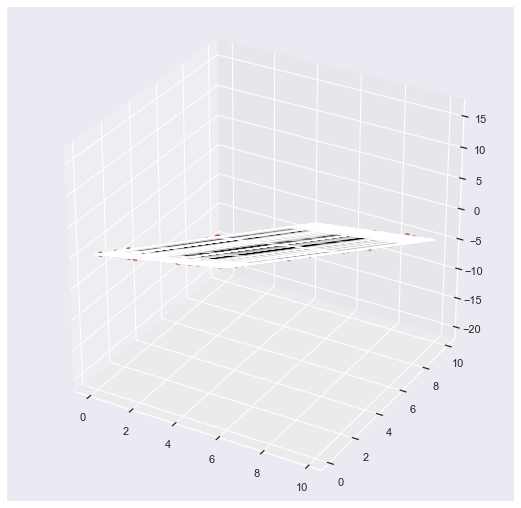

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221,projection='3d')

ax.scatter(X.T[0],X.T[1],y, c='r', marker='o')

# generar una grilla de x,y
xx, yy = np.meshgrid(X.T[0],X.T[1])

exog = pd.core.frame.DataFrame({'X': xx.ravel(), 'Y': yy.ravel()})
out = model.predict(exog)
ax.plot_surface(xx, yy,
                out.reshape(xx.shape),
                rstride=1,
                cstride=3,
                color='None',
                alpha = 0.1)
plt.show()

In [16]:
mse = mean_squared_error(y,model.predict(X))
mape = mean_absolute_error(y,model.predict(X))
r2 = r2_score(y,model.predict(X))
mse, mape, r2

(4.327025324653691e-30, 1.5221157667610897e-15, 1.0)

## 5. Árboles de regresión

Cubriremos los siguientes temas:
- Selección de hiper-parámetros.
- Interpretación de los árboles.
- Importancia de variables.
- Tipos de ensambles: simulatáneos y secuenciales.
- Regularización de árboles.
- Evaluación de los modelos.

### Árboles de regresión

Los árboles de decisión son formas extremadamente intuitivas para clasificar o etiquetar objetos: simplemente hace una serie de preguntas diseñadas para concentrarse en la regresión o clasificación.
Por ejemplo, si desea construir un árbol de decisión para clasificar una casa, puede construir el que se muestra aquí:

<img src="https://raw.githubusercontent.com/RodrigoLaraMolina/DPATTSrc/master/decision-tree-house.png" alt="decision_tree" style="width: 700px;" align="center" frameborder="200"/>

<img src="https://i.stack.imgur.com/Pqa9a.png" width="500" class="center">

In [17]:
# import tree from Scikit-Learn
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV


Para esta y la siguiente sección estudiaremos el **Conjunto de datos de vivienda de Boston** que consiste en el precio de las casas en varios lugares de Boston. Junto con el precio, el conjunto de datos también proporciona información como la tasa de criminalidad (CRIM), áreas de negocios no minoristas en la ciudad (INDUS), la edad de las personas que poseen la casa (EDAD) y hay muchos otros atributos

In [18]:
#load the Boston data set in it's original format (dictionary)
from sklearn.datasets import load_boston
raw_data = load_boston()

# Create a Pandas Data Frame with the Boston data
boston = pd.DataFrame(raw_data.data)
boston.columns = raw_data.feature_names
boston['PRICE'] = raw_data.target
display(boston.head(10))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [19]:
# Separamos las variables independientes y dependiente
X = boston.drop('PRICE', axis = 1)
Y = boston['PRICE']

# importar función para separar dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Separamos dataset con test del 30% de las observaciones
X_train, X_test, Y_train, Y_test = train_test_split(

    X, Y, test_size = 0.3, random_state = 5)

In [20]:
%%time
# definimos el arbol de decisión
tree_model = DecisionTreeRegressor(random_state=5)

# ajustar el modelo a los datos
tree_model.fit(X_train, Y_train)

CPU times: user 3.98 ms, sys: 1.04 ms, total: 5.02 ms
Wall time: 3.72 ms


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

#### Visualización del árbol

Double click to zoom


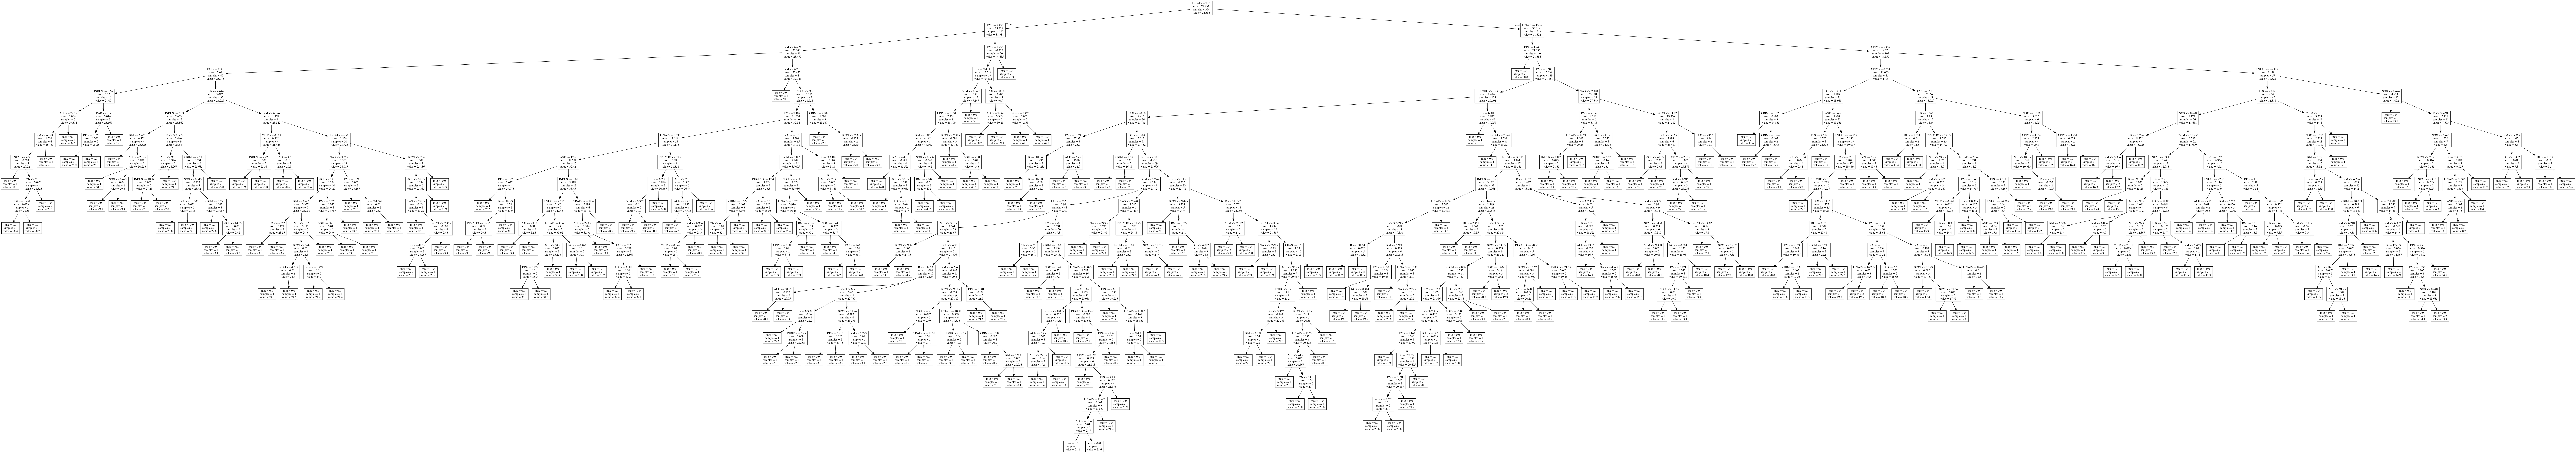

In [21]:
# importar los paquetes para visualizar arboles de decision
from graphviz import Source
from IPython.display import Image

# crear la visualizacion como png
graph = Source(tree.export_graphviz(tree_model, out_file=None,
                                     feature_names=X.columns))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

# mostrar la imagen creada   
from IPython.display import Image
print('Double click to zoom')
Image(png_bytes)

In [22]:
# error de entranamiento y prueba
pred_train = tree_model.predict(X_train)
pred_test= tree_model.predict(X_test)
mse_train = mean_squared_error(Y_train,pred_train)
mse_test = mean_squared_error(Y_test, pred_test)
print("El mse de entrenamiento es: {0:.3f}".format(mse_train))
print("El mse de prueba es: {0:.3f}".format(mse_test))

El mse de entrenamiento es: 0.000
El mse de prueba es: 32.835


__HAY OVERFITTING!!!__

#### Regularización de árboles (_podar el árbol_)

In [23]:
param_grid = {'max_depth': list(range(2,15)), 
              'max_leaf_nodes': [5,10,15,20,None]}

grid = GridSearchCV(DecisionTreeRegressor(random_state=5), param_grid, cv=5)
grid.fit(X_train, Y_train)
grid.best_params_

{'max_depth': 5, 'max_leaf_nodes': None}

In [24]:
best_tree = grid.best_estimator_

Double click to zoom


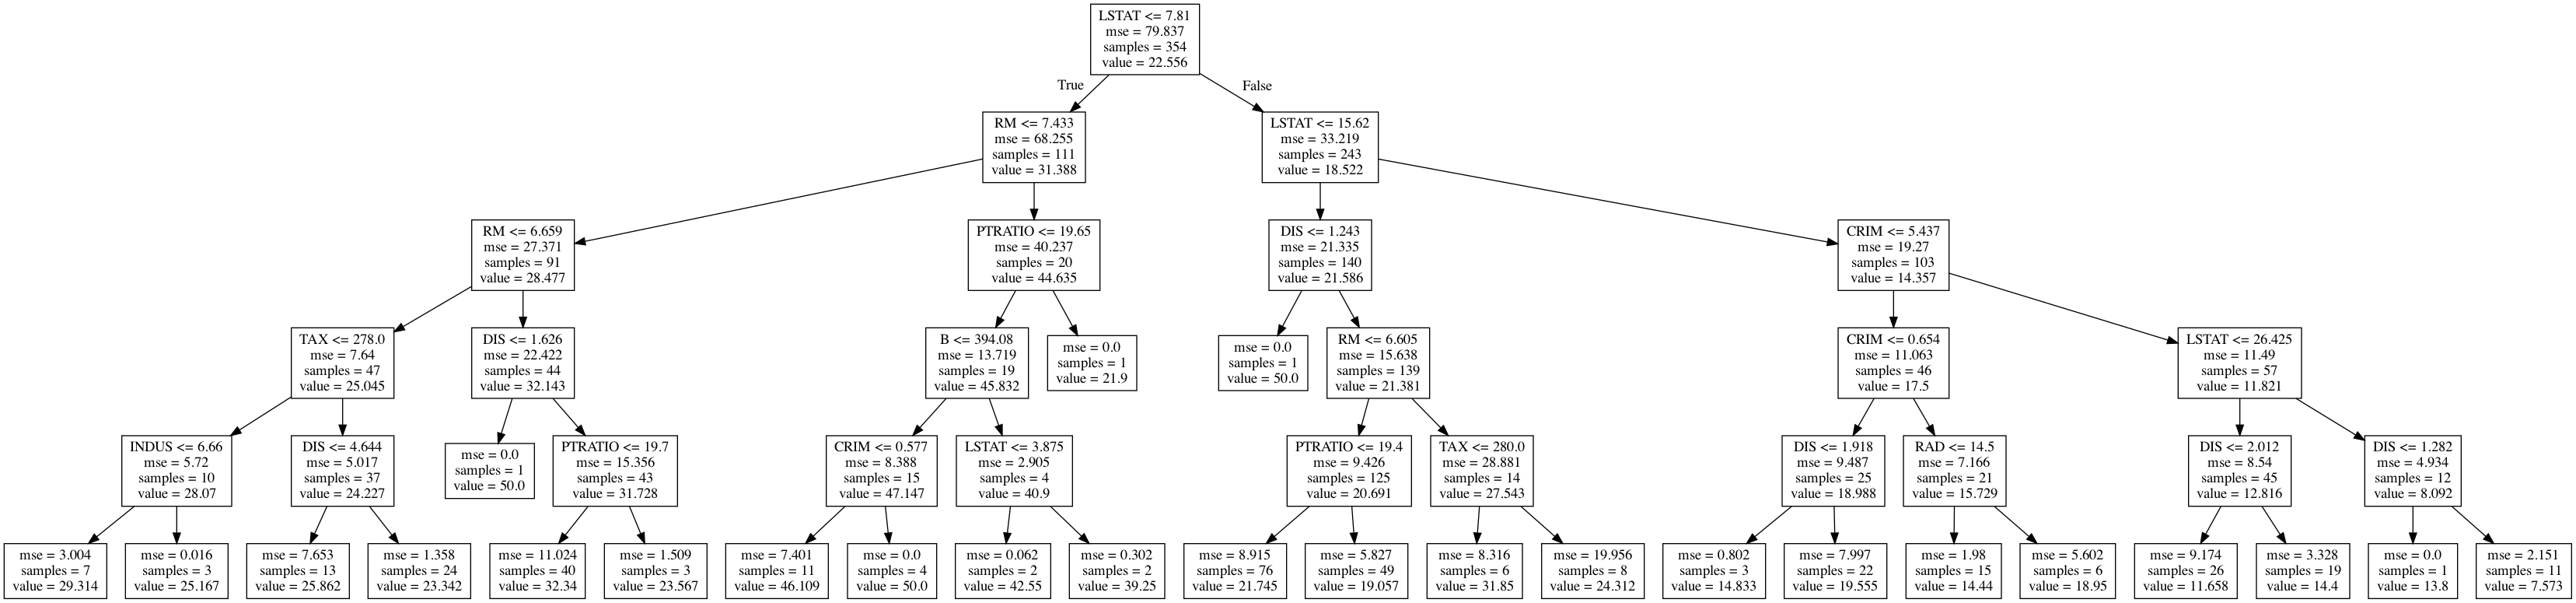

In [25]:
# crear la visualizacion como png
graph = Source(tree.export_graphviz(best_tree, out_file=None,
                                     feature_names=X.columns))
png_bytes = graph.pipe(format='png')
with open('best_tree.png','wb') as f:
    f.write(png_bytes)

# mostrar la imagen creada   
from IPython.display import Image
print('Double click to zoom')
Image(png_bytes)

In [26]:
# error de entranamiento y prueba
pred_train = best_tree.predict(X_train)
pred_test= best_tree.predict(X_test)
mse_train = mean_squared_error(Y_train,pred_train)
mse_test = mean_squared_error(Y_test, pred_test)
print("El mse de entrenamiento para el mejor árbol es: {0:.3f}".format(mse_train))
print("El mse de prueba para el mejor árbol es: {0:.3f}".format(mse_test))

El mse de entrenamiento para el mejor árbol es: 6.838
El mse de prueba para el mejor árbol es: 18.845


#### Variables más importantes

In [27]:
# Creamos un dataframe con las importancias
importancia_arbol=pd.DataFrame(best_tree.feature_importances_, index=X.columns, columns=['Importancia'])
importancia_arbol

,Importancia
CRIM,0.038180
ZN,0.000000
INDUS,0.001398
CHAS,0.000000
NOX,0.000000
RM,0.232837
AGE,0.000000
DIS,0.053013
RAD,0.003373
TAX,0.012037
